In [1]:
import pandas as pd
import os

In [2]:
os.chdir("..")

In [3]:
os.getcwd()

'c:\\Users\\user\\Downloads\\ten_academy\\week8\\Causal_Inference'

In [4]:
# Load the datasets
completed_orders = pd.read_csv('data/nb.csv')
delivery_requests = pd.read_csv('data/driver_locations_during_request.csv')

### Handle Missing Values
Let's start by handling the missing values in the `Trip Start Time` and `Trip End Time` columns.

In [7]:
# Handling missing values in the completed_orders dataset
# Drop rows where Trip Start Time or Trip End Time are missing
completed_orders_cleaned = completed_orders.dropna(subset=['Trip Start Time', 'Trip End Time'])

In [8]:
# Display the number of rows before and after dropping missing values
rows_before = len(completed_orders)
rows_after = len(completed_orders_cleaned)

rows_before, rows_after

(536020, 534368)

##### We have removed 1,652 rows with missing values in the Trip Start Time and Trip End Time columns.

**Next We Convert Data Types**

Convert Trip Start Time and Trip End Time to datetime format.

In [9]:
# Convert Trip Start Time and Trip End Time to datetime format
completed_orders_cleaned['Trip Start Time'] = pd.to_datetime(completed_orders_cleaned['Trip Start Time'])
completed_orders_cleaned['Trip End Time'] = pd.to_datetime(completed_orders_cleaned['Trip End Time'])

# Confirm the data types have been converted
completed_orders_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 534368 entries, 0 to 536019
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Trip ID           534368 non-null  int64         
 1   Trip Origin       534368 non-null  object        
 2   Trip Destination  534368 non-null  object        
 3   Trip Start Time   534368 non-null  datetime64[ns]
 4   Trip End Time     534368 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 24.5+ MB


C:\Users\user\AppData\Local\Temp\ipykernel_16572\2202148333.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_orders_cleaned['Trip Start Time'] = pd.to_datetime(completed_orders_cleaned['Trip Start Time'])
C:\Users\user\AppData\Local\Temp\ipykernel_16572\2202148333.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_orders_cleaned['Trip End Time'] = pd.to_datetime(completed_orders_cleaned['Trip End Time'])


In [10]:
completed_orders.head()

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28
2,391998,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23
3,391999,"6.572757200000001,3.3677082","6.584881099999999,3.3614073",2021-07-01 07:16:07,2021-07-01 07:29:42
4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36


In [19]:
delivery_requests.head()

,id,order_id,driver_id,driver_action,lat,lng,created_at,updated_at
0,1,392001,243828,accepted,6.602207,3.270465,NaN,NaN
1,2,392001,243588,rejected,6.592097,3.287445,NaN,NaN
2,3,392001,243830,rejected,6.596133,3.281784,NaN,NaN
3,4,392001,243539,rejected,6.596142,3.280526,NaN,NaN
4,5,392001,171653,rejected,6.609232,3.288800,NaN,NaN


In [11]:
delivery_requests.head()

,id,order_id,driver_id,driver_action,lat,lng,created_at,updated_at
0,1,392001,243828,accepted,6.602207,3.270465,NaN,NaN
1,2,392001,243588,rejected,6.592097,3.287445,NaN,NaN
2,3,392001,243830,rejected,6.596133,3.281784,NaN,NaN
3,4,392001,243539,rejected,6.596142,3.280526,NaN,NaN
4,5,392001,171653,rejected,6.609232,3.288800,NaN,NaN


In [29]:
# show all the rows that order id is 392001	and driver action is rejected and accepted
completed_orders[(completed_orders['Trip ID'] == 392001)]

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time
4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36


In [ ]:
# show all the rows that order id is 392001	and driver action is rejected and accepted
delivery_requests[(delivery_requests['order_id'] == 392001)]

,id,order_id,driver_id,driver_action,lat,lng,created_at,updated_at
0,1,392001,243828,accepted,6.602207,3.270465,NaN,NaN
1,2,392001,243588,rejected,6.592097,3.287445,NaN,NaN
2,3,392001,243830,rejected,6.596133,3.281784,NaN,NaN
3,4,392001,243539,rejected,6.596142,3.280526,NaN,NaN
4,5,392001,171653,rejected,6.609232,3.288800,NaN,NaN
5,6,392001,245662,rejected,6.593095,3.287759,NaN,NaN
6,7,392001,171651,rejected,6.613538,3.270779,NaN,NaN
7,8,392001,243906,rejected,6.591838,3.276124,NaN,NaN
8,9,392001,226949,rejected,6.610941,3.276126,NaN,NaN
9,10,392001,243769,rejected,6.617199,3.271723,NaN,NaN


In [22]:
# show all the rows that order id is 392001	and driver action is accepted
delivery_requests[(delivery_requests['order_id'] == 392001) & (delivery_requests['driver_action'] == 'accepted')]

,id,order_id,driver_id,driver_action,lat,lng,created_at,updated_at
0,1,392001,243828,accepted,6.602207,3.270465,NaN,NaN


In [25]:
# show all the rows that order id is 392001	and driver action is rejected
delivery_requests[(delivery_requests['order_id'] == 392001) & (delivery_requests['driver_action'] == 'rejected')]

,id,order_id,driver_id,driver_action,lat,lng,created_at,updated_at
1,2,392001,243588,rejected,6.592097,3.287445,NaN,NaN
2,3,392001,243830,rejected,6.596133,3.281784,NaN,NaN
3,4,392001,243539,rejected,6.596142,3.280526,NaN,NaN
4,5,392001,171653,rejected,6.609232,3.288800,NaN,NaN
5,6,392001,245662,rejected,6.593095,3.287759,NaN,NaN
6,7,392001,171651,rejected,6.613538,3.270779,NaN,NaN
7,8,392001,243906,rejected,6.591838,3.276124,NaN,NaN
8,9,392001,226949,rejected,6.610941,3.276126,NaN,NaN
9,10,392001,243769,rejected,6.617199,3.271723,NaN,NaN


**Next We Inspect and Treat Outliers**

Identify outliers in numerical columns (e.g., trip durations).

C:\Users\user\AppData\Local\Temp\ipykernel_16572\1025384685.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_orders_cleaned['Trip Duration'] = (completed_orders_cleaned['Trip End Time'] - completed_orders_cleaned['Trip Start Time']).dt.total_seconds() / 60


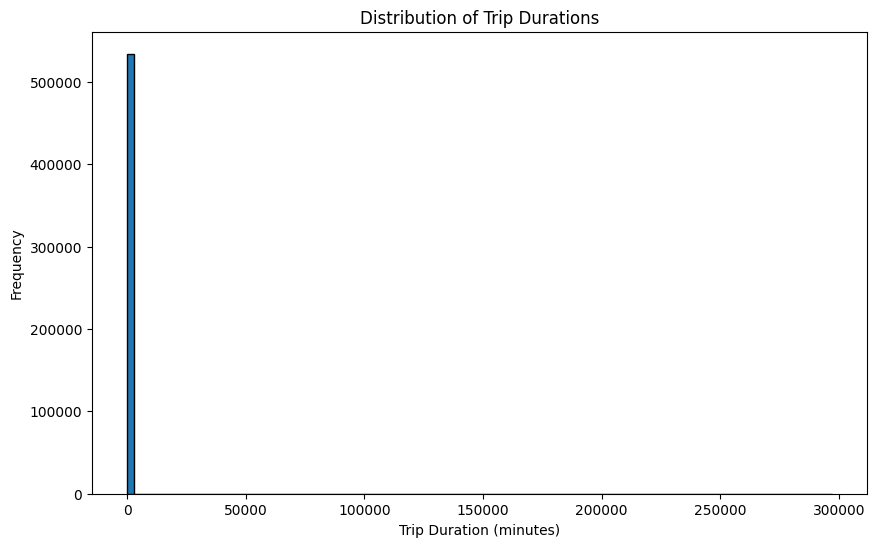

count    534368.000000
mean         81.606611
std         797.344447
min           0.000000
25%          33.683333
50%          52.950000
75%          80.133333
max      296895.100000
Name: Trip Duration, dtype: float64

In [12]:
# Calculate trip duration in minutes
completed_orders_cleaned['Trip Duration'] = (completed_orders_cleaned['Trip End Time'] - completed_orders_cleaned['Trip Start Time']).dt.total_seconds() / 60

# Visualize the distribution of trip durations to identify outliers
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(completed_orders_cleaned['Trip Duration'], bins=100, edgecolor='k')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Durations')
plt.show()

# Calculate basic statistics for trip durations
trip_duration_stats = completed_orders_cleaned['Trip Duration'].describe()
trip_duration_stats

**Observations**
The maximum trip duration seems unusually high, indicating potential outliers.
The standard deviation is also very high, suggesting significant variability in trip durations.

### Next Steps Identify and Handle Outliers
Remove or investigate trips with excessively high durations.
Consider trips with durations significantly above the 75th percentile as potential outliers.

In [13]:
delivery_requests['driver_action'].isna().sum()

0

In [14]:
delivery_requests['driver_action'].unique()

array(['accepted', 'rejected'], dtype=object)

In [15]:
delivery_requests['driver_action'].value_counts()

driver_action
rejected    1531837
accepted      25903
Name: count, dtype: int64

In [16]:
delivery_requests['driver_action'].describe()

count      1557740
unique           2
top       rejected
freq       1531837
Name: driver_action, dtype: object

In [17]:
# percentage of rejected orders
delivery_requests['driver_action'].describe()['freq'] * 100 /delivery_requests.shape[0]

98.33714227021197

In [18]:
# percentage of rejected orders
delivery_requests['driver_action'].value_counts()['accepted'] * 100 /delivery_requests.shape[0]

1.6628577297880263

In [31]:
# Calculate the Interquartile Range (IQR)
Q1 = completed_orders_cleaned['Trip Duration'].quantile(0.25)
Q3 = completed_orders_cleaned['Trip Duration'].quantile(0.75)
IQR = Q3 - Q1

# Determine outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
completed_orders_no_outliers = completed_orders_cleaned[
    (completed_orders_cleaned['Trip Duration'] >= lower_bound) &
    (completed_orders_cleaned['Trip Duration'] <= upper_bound)
]

# Display the number of rows before and after removing outliers
rows_after_outlier_removal = len(completed_orders_no_outliers)

lower_bound, upper_bound, rows_after_outlier_removal


(-35.99166666666668, 149.80833333333334, 505323)

In [59]:
# rename the column Trip Duration to Trip Duration(minutes)
completed_orders_no_outliers.rename(columns={'Trip Duration': 'Trip Duration(minutes)'}, inplace=True)

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


**Outlier Thresholds and Data Cleaning**
Lower Bound: -35.99 minutes (This indicates that there are no trip durations significantly below zero, so we only need to consider the upper bound.)
Upper Bound: 149.81 minutes